# Project Three: Simple Linear Regression and Multiple Regression

This notebook contains step-by-step directions for Project Three. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to write your summary report. 


You are a data analyst for a basketball team and have access to a large set of historical data that you can use to analyze performance patterns. The coach of the team and your management have requested that you come up with regression models that predict the total number of wins for a team in the regular season based on key performance metrics. Although the data set is the same that you used in the previous projects, the data set used here has been aggregated to study the total number of wins in a regular season based on performance metrics shown in the table below. These regression models will help make key decisions to improve the performance of the team. You will use the Python programming language to perform the statistical analyses and then prepare a report of your findings to present for the team’s management. Since the managers are not data analysts, you will need to interpret your findings and describe their practical implications. 

There are four important variables in the data set that you will utilize in Project Three. 


| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent </div> |
| -- | --  |
| <div style="text-align: left"> total_wins </div> | <div style="text-align: left"> Total number of wins in a regular season </div> |
| <div style="text-align: left"> avg_pts </div> | <div style="text-align: left"> Average points scored in a regular season </div> |
| <div style="text-align: left"> avg_elo_n </div> | <div style="text-align: left"> Average relative skill of each team in a regular season</div> |
| <div style="text-align: left"> avg_pts_differential </div> | <div style="text-align: left"> Average point differential between the team and their opponents in a regular season </div> |
| <div style="text-align: left"> avg_elo_differential </div> | <div style="text-align: left"> Average relative skill differential between the team and their opponent in a regular season </div> |


The average relative skill (represented by the variable **avg_elo_n** in the data set) is simply the average of a team's relative skill in a regular season. Relative skill is measured using the ELO rating. This measure is inferred based on the final score of a game, the game location, and the outcome of the game relative to the probability of that outcome. The higher the number, the higher the relative skill of a team. 


Reminder: It may be beneficial to review the summary report document for Project Three prior to starting this Python script. That will give you an idea of the questions you will need to answer with the outputs of this script.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 1: Data Preparation
This step uploads the data set from a CSV file and transforms the data into a form that will be used to create regression models. The data will be aggregated to calculate the number of wins for teams in a basketball regular season between the years 1995 and 2015. 

Click the block of code below and hit the **Run** button above.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# dataframe for this project
nba_wins_df = pd.read_csv('nba_wins_data.csv')

display(HTML(nba_wins_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the dataset =", len(nba_wins_df))

,year_id,fran_id,avg_pts,avg_opp_pts,avg_elo_n,avg_opp_elo_n,avg_pts_differential,avg_elo_differential,total_wins
0,1995,Bucks,99.341463,103.707317,1368.604789,1497.311587,-4.365854,-128.706798,34
1,1995,Bulls,101.524390,96.695122,1569.892129,1488.199352,4.829268,81.692777,47
2,1995,Cavaliers,90.451220,89.829268,1542.433391,1498.848261,0.621951,43.585130,43
3,1995,Celtics,102.780488,104.658537,1431.307532,1495.936224,-1.878049,-64.628693,35
4,1995,Clippers,96.670732,105.829268,1309.053701,1517.260260,-9.158537,-208.206558,17


printed only the first five observations...
Number of rows in the dataset = 618


## Step 2: Scatterplot and Correlation for the Total Number of Wins and Average Relative Skill
Your coach expects teams to win more games in a regular season if they have a higher average relative skill compared to their opponents. This is because the chances of winning are higher if a team can maintain high average relative skill. Therefore, it is expected that the total number of wins and the average relative skill are correlated. Calculate the Pearson correlation coefficient and its P-value. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??DATAFRAME_NAME??</strong> with the name of the dataframe used in this project. </font> See Step 1 for the name of dataframe used in this project. 


2. <font color='red'> Replace <strong>??RELATIVE_SKILL??</strong> with the name of the variable for average relative skill.</font> See the table included in the Project Three instructions above to pick the variable name. Enclose this variable in single quotes. For example, if the variable name is **var1** then replace ??RELATIVE_SKILL?? with 'var1'.


3. <font color='red'> Replace <strong>??WINS??</strong> with the name of the variable for the total number of wins in a regular season. Remember to enclose the variable in single quotes.</font> See the table included in the Project Three instructions above to pick the variable name. Enclose this variable in single quotes. For example, if the variable name is **var2** then replace ??WINS?? with 'var2'.


The code block below will print a scatterplot of the total number of wins against the average relative skill. 

After you are done with your edits, click the block of code below and hit the **Run** button above.

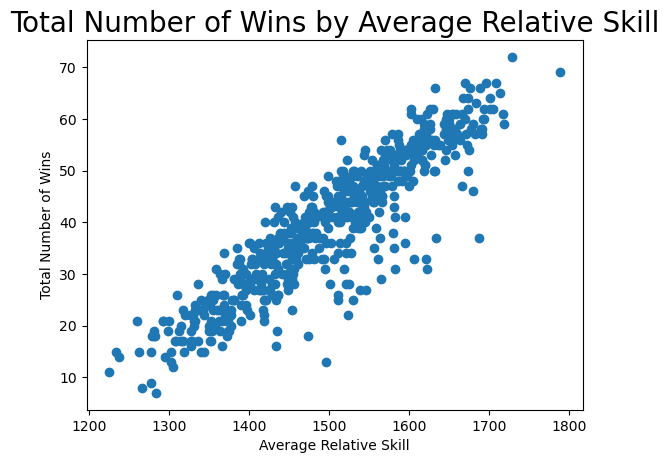

Correlation between Average Relative Skill and the Total Number of Wins 
Pearson Correlation Coefficient = 0.9072
P-value = 0.0


In [2]:
import scipy.stats as st

# ---- TODO: make your edits here ----
plt.plot(nba_wins_df['avg_elo_n'], nba_wins_df['total_wins'], 'o')

plt.title('Total Number of Wins by Average Relative Skill', fontsize=20)
plt.xlabel('Average Relative Skill')
plt.ylabel('Total Number of Wins')
plt.show()


# ---- TODO: make your edits here ----
correlation_coefficient, p_value = st.pearsonr(nba_wins_df['avg_elo_n'], nba_wins_df['total_wins'])

print("Correlation between Average Relative Skill and the Total Number of Wins ")
print("Pearson Correlation Coefficient =",  round(correlation_coefficient,4))
print("P-value =", round(p_value,4))

## Step 3: Simple Linear Regression: Predicting the Total Number of Wins using Average Relative Skill

The coach of your team suggests a simple linear regression model with the total number of wins as the response variable and the average relative skill as the predictor variable. He expects a team to have more wins in a season if it maintains a high average relative skill during that season. This regression model will help your coach predict how many games your team might win in a regular season. Create this simple linear regression model. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??RESPONSE_VARIABLE??</strong> with the variable name that is being predicted. </font> See the table included in the Project Three instructions above to pick the variable name. Do not enclose this variable in quotes. For example, if the variable name is **var1** then replace ??RESPONSE_VARIABLE?? with var1.


2. <font color='red'> Replace <strong>??PREDICTOR_VARIABLE??</strong> with the variable name that is the predictor. </font> See the table included in Project Three instructions above to pick the variable name. Do not enclose this variable in quotes. For example, if the variable name is **var2** then replace ??PREDICTOR_VARIABLE?? with var2.


For example, if the variable names are **var1** for the response variable and **var2** for the predictor variable, then the expression in the code block below should be:
model = smf.ols('var1 ~ var2', nba_wins_df).fit()

After you are done with your edits, click the block of code below and hit the **Run** button above.

In [3]:
import statsmodels.formula.api as smf

# Simple Linear Regression
# ---- TODO: make your edits here ---
model1 = smf.ols('total_wins ~ avg_elo_n', data=nba_wins_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     2865.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.06e-234
Time:                        18:06:06   Log-Likelihood:                -1930.3
No. Observations:                 618   AIC:                             3865.
Df Residuals:                     616   BIC:                             3873.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -128.2475      3.149    -40.731      0.0

## Step 4: Scatterplot and Correlation for the Total Number of Wins and Average Points Scored
Your coach expects teams to win more games in a regular season if they score more points on average during the season. This is because the chances of winning are higher if a team maintains high average points scored. Therefore, it is expected that the total number of wins and the average points scored are correlated. Calculate the Pearson correlation coefficient and its P-value. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??DATAFRAME_NAME??</strong> with the name of the dataframe used in this project. </font> See Step 1 for the name of dataframe used in this project. 


2. <font color='red'> Replace <strong>??POINTS??</strong> with the name of the variable for average points scored in a regular season.</font> See the table included in the Project Three instructions above to pick the variable name. Enclose this variable in single quotes. For example, if the variable name is **var1** then replace ??POINTS?? with 'var1'.


3. <font color='red'> Replace <strong>??WINS??</strong> with the name of the variable for the total number of wins in a regular season. Remember to enclose the variable in single quotes.</font> See the table included in the Project Three instructions above to pick the variable name. Enclose this variable in single quotes. For example, if the variable name is **var2** then replace ??WINS?? with 'var2'.


The code block below will print a scatterplot of the total number of wins against the average points scored in a regular season. 

After you are done with your edits, click the block of code below and hit the **Run** button above.

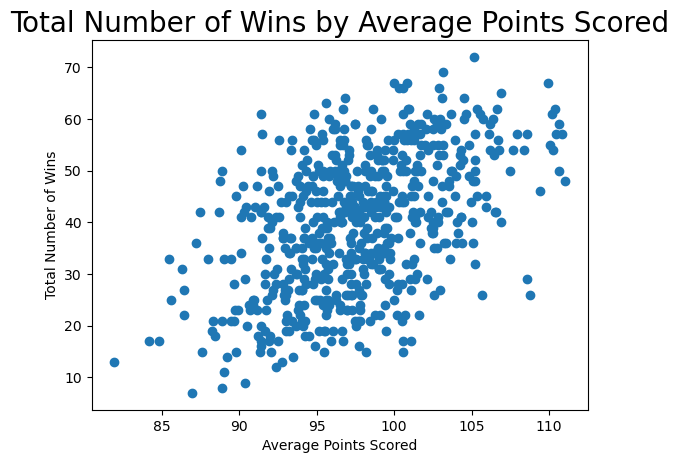

Correlation between Average Points Scored and the Total Number of Wins 
Pearson Correlation Coefficient = 0.9072
P-value = 0.0


In [4]:
import scipy.stats as st

# ---- TODO: make your edits here ----
plt.plot(nba_wins_df['avg_pts'], nba_wins_df['total_wins'], 'o')

plt.title('Total Number of Wins by Average Points Scored', fontsize=20)
plt.xlabel('Average Points Scored')
plt.ylabel('Total Number of Wins')
plt.show()


# ---- TODO: make your edits here ----
corr_coeff, p_val = st.pearsonr(nba_wins_df['avg_pts'], nba_wins_df['total_wins'])

print("Correlation between Average Points Scored and the Total Number of Wins ")
print("Pearson Correlation Coefficient =",  round(correlation_coefficient,4))
print("P-value =", round(p_value,4))

## Step 5: Multiple Regression: Predicting the Total Number of Wins using Average Points Scored and Average Relative Skill

Instead of presenting a simple linear regression model to the coach, you can suggest a multiple regression model with the total number of wins as the response variable and the average points scored and the average relative skill as predictor variables. This regression model will help your coach predict how many games your team might win in a regular season based on metrics like the average points scored and average relative skill. This model is more practical because you expect more than one performance metric to determine the total number of wins in a regular season. Create this multiple regression model. Make the following edits to the code block below:

1. <font color='red'> Replace <strong>??RESPONSE_VARIABLE??</strong> with the variable name that is being predicted. </font> See the table included in the Project Three instructions above.  Do not enclose this variable in quotes. For example, if the variable name is **var0** then replace ??RESPONSE_VARIABLE?? with var0.


2. <font color='red'> Replace <strong>??PREDICTOR_VARIABLE_1??</strong> with the variable name for average points scored. </font> Hint: See the table included in the Project Three instructions above. Do not enclose this variable in quotes. For example, if the variable name is **var1** then replace ??PREDICTOR_VARIABLE_1?? with var1.


2. <font color='red'> Replace <strong>??PREDICTOR_VARIABLE_2??</strong> with the variable name for average relative skill. </font> Hint: See the table included in the Project Three instructions above. Do not enclose this variable in quotes. For example, if the variable name is **var2** then replace ??PREDICTOR_VARIABLE_2?? with var2.


For example, if the variable names are **var0** for the response variable and **var1**, **var2** for the predictor variables, then the expression in the code block below should be:
model = smf.ols('var0 ~ var1 + var2', nba_wins_df).fit()

After you are done with your edits, click the block of code below and hit the **Run** button above.

In [5]:
import statsmodels.formula.api as smf

# Multiple Regression
# ---- TODO: make your edits here ---
model2 = smf.ols('total_wins ~ avg_pts + avg_elo_n', data=nba_wins_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1580.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          4.41e-243
Time:                        18:08:36   Log-Likelihood:                -1904.6
No. Observations:                 618   AIC:                             3815.
Df Residuals:                     615   BIC:                             3829.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -152.5736      4.500    -33.903      0.0

## Step 6: Multiple Regression: Predicting the Total Number of Wins using Average Points Scored, Average Relative Skill, Average Points Differential and Average Relative Skill Differential

The coach also wants you to consider the average points differential and average relative skill differential as predictor variables in the multiple regression model. Create a multiple regression model with the total number of wins as the response variable, and average points scored, average relative skill, average points differential and average relative skill differential as predictor variables. This regression model will help your coach predict how many games your team might win in a regular season based on metrics like the average score, average relative skill, average points differential and average relative skill differential between the team and their opponents. 

<font><strong>You are to write this code block yourself.</strong></font> 

Use Step 5 to help you write this code block. Here is some information that will help you write this code block. Reach out to your instructor if you need help.

1. <font color='red'> The dataframe used in this project is called nba_wins_df. </font>
2. <font color='red'> The variable **avg_pts** represents average points scored by each team in a regular season. </font>
3. <font color='red'> The variable **avg_elo_n** represents average relative skill of each team in a regular season. </font>
4. <font color='red'> The variable **avg_pts_differential** represents average points differential between each team and their opponents in a regular season. </font>
5. <font color='red'> The variable **avg_elo_differential** represents average relative skill differential between each team and their opponents in a regular season. </font>
6. <font color='red'> Print the model summary. </font>

Write your code in the code block section below. After you are done, click this block of code and hit the **Run** button above. Reach out to your instructor if you need more help with this step.

In [6]:
# Write your code in this code block section
model3 = smf.ols('total_wins ~ avg_pts + avg_elo_n + avg_pts_differential + avg_elo_differential', data=nba_wins_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1102.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.07e-278
Time:                        18:09:44   Log-Likelihood:                -1815.5
No. Observations:                 618   AIC:                             3641.
Df Residuals:                     613   BIC:                             3663.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               34.5753 

## End of Project Three
Download the HTML output and submit it with your summary report for Project Three. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Do not include the Python code within your summary report.